# Data Split

In [ ]:
from sklearn.model_selection import train_test_split

cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)

# Model - SVM

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


 
def model_SVM(train_X, test_X, train_y, test_y) :
  SVM = svm.SVC()
  SVM.fit(train_X, train_y)
  pred_y = SVM.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))

**Training three datasets on Basic SVM and Prediction/Accuracy**

In [ ]:
model_SVM(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
#model_SVM(svd_cv_train_X, svd_cv_test_X, svd_cv_train_Y, svd_cv_test_y)

model_SVM(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
#model_SVM(svd_tfidf_train_X, svd_tfidf_test_X, svd_tfidf_train_Y, svd_tfidf_test_y)

model_SVM(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_SVM(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

accuracy_score: 0.799
Recall: 0.639
Precision: 0.864
F1 Score: 0.735
accuracy_score: 0.761
Recall: 0.493
Precision: 0.923
F1 Score: 0.643
accuracy_score: 0.624
Recall: 0.163
Precision: 0.857
F1 Score: 0.274
accuracy_score: 0.709
Recall: 0.434
Precision: 0.809
F1 Score: 0.565


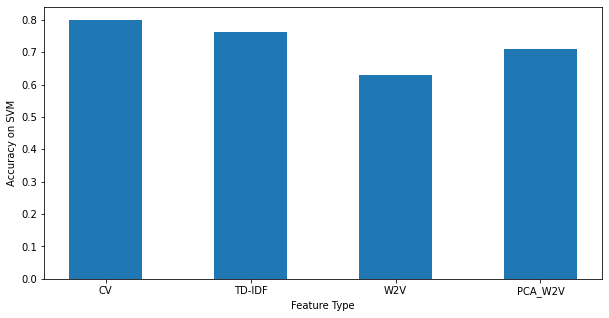

In [ ]:
#visualization

data = {'CV':0.799, 'TD-IDF':0.761, 'W2V':0.624,'PCA_W2V':0.709}
datatype = list(data.keys())
acc = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(datatype, acc, width = 0.5)
 
plt.xlabel("Feature Type")
plt.ylabel("Accuracy on SVM")
plt.show()

In [ ]:
sns.lineplot(data=data)

**SVM with CounterVector has higher accuracy**

accuracy_score: 0.800
Recall: 0.668
Precision: 0.839
F1 Score: 0.744


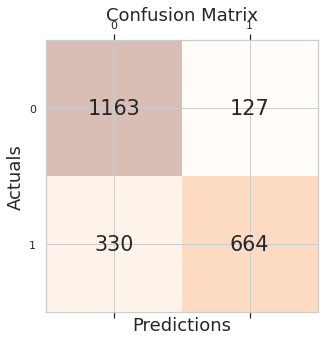

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def testModel(train_x, test_x, train_y, test_y, _c, _gam, _kn):
  SVM = svm.SVC(kernel=_kn, C=_c)
  SVM.fit(train_x, train_y)
  pred_y = SVM.predict(test_x)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


  conf_matrix = confusion_matrix(y_true=test_y, y_pred=pred_y)
  #
  # Print the confusion matrix using Matplotlib
  #
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


'''
To find best tuning option

group_c = [5, 1, 0.1, 0.05, 0.01, 0.001]
group_gam = [5, 1, 0.1, 0.05, 0.01, 0.001]

for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
'''
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'linear')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'poly')

testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'sigmoid')

# *LogisticRegression*

In [ ]:
from sklearn.linear_model import LogisticRegression

def model_Logistic(train_X, test_X, train_y, test_y) :
  logisticRegr = LogisticRegression()
  logisticRegr.fit(train_X, train_y)
  pred_y = logisticRegr.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [ ]:
model_Logistic(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_Logistic(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_Logistic(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_Logistic(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

accuracy_score: 0.797
Recall: 0.693
Precision: 0.813
F1 Score: 0.749
accuracy_score: 0.776
Recall: 0.539
Precision: 0.908
F1 Score: 0.677
accuracy_score: 0.669
Recall: 0.314
Precision: 0.806
F1 Score: 0.452
accuracy_score: 0.751
Recall: 0.603
Precision: 0.776
F1 Score: 0.678


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**LogitricRegression with CountVector has better accuracy**

In [ ]:
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

'''
To find best tuning option

'''
group_c = [10, 5, 1, 0.1, 0.001]

for c in group_c:
    logistic_lasso = LogisticRegression(C=c, penalty='l1', tol=0.001, solver='saga', random_state=42,  max_iter=10000) #lasso
    logistic_ridge = LogisticRegression(C=c, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=10000)  #Ridge 
    l_ela = LogisticRegression(C=c, penalty='elasticnet', solver='saga', l1_ratio=0.5, tol=0.001, max_iter=10000)
    
    logistic_lasso.fit(cv_train_X, cv_train_Y.values.ravel())
    logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
    l_ela.fit(cv_train_X, cv_train_Y.values.ravel())
    
    coef_l1_LR = logistic_lasso.coef_.ravel()
    coef_l2_LR = logistic_ridge.coef_.ravel()
    coef_ela_LR = l_ela.coef_.ravel()
    
    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100 
    sparsity_l_ela = np.mean(coef_ela_LR == 0) * 100 

    print("\n C=%.5f" % c)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Ela penalty:", sparsity_l_ela))
    print("{:<40} {:.3f}".format("Score with L1 penalty:", logistic_lasso.score(cv_test_X, cv_test_y.values.ravel())))  #lasso score
    print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score
    print("{:<40} {:.3f}".format("Score with Ela penalty:",l_ela.score(cv_test_X, cv_test_y.values.ravel())))   #elastic score


 C=10.00000
Sparsity with L1 penalty:                53.47%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               38.10%
Score with L1 penalty:                   0.782
Score with L2 penalty:                   0.784
Score with Ela penalty:                  0.783

 C=5.00000
Sparsity with L1 penalty:                68.21%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               49.63%
Score with L1 penalty:                   0.783
Score with L2 penalty:                   0.787
Score with Ela penalty:                  0.788

 C=1.00000
Sparsity with L1 penalty:                93.60%
Sparsity with L2 penalty:                20.19%
Sparsity with Ela penalty:               81.05%
Score with L1 penalty:                   0.783
Score with L2 penalty:                   0.793
Score with Ela penalty:                  0.789

 C=0.10000
Sparsity with L1 penalty:                99.52%
Sparsity with L2 penalty:                20.19%


In [ ]:

logistic_ridge = LogisticRegression(C=0.1, penalty='l2', tol=0.001, solver='liblinear', random_state=42, max_iter=10000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score

logistic_ridge = LogisticRegression(C=0.18, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=10000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score


logistic_ridge = LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score


logistic_ridge = LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='liblinear', random_state=42, max_iter=10000)  #Ridge 
logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score


Score with L2 penalty:                   0.798
Score with L2 penalty:                   0.799
Score with L2 penalty:                   0.800
Score with L2 penalty:                   0.799


accuracy_score: 0.800
Recall: 0.672
Precision: 0.837
F1 Score: 0.746


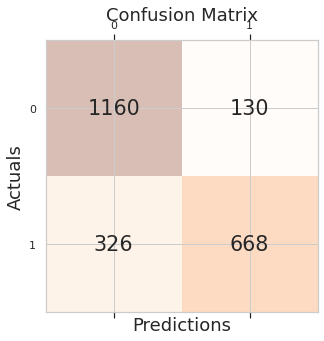

In [ ]:
''' BEST OPTION'''
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

logisticRegr = LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)
logisticRegr.fit(cv_train_X, cv_train_Y)
pred_y = logisticRegr.predict(cv_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def model_DT (train_X, test_X, train_y, test_y) :
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  pred_y = clf.predict(test_X)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [ ]:
model_DT(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_DT(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_DT(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_DT(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

accuracy_score: 0.749
Recall: 0.671
Precision: 0.731
F1 Score: 0.700
accuracy_score: 0.752
Recall: 0.684
Precision: 0.730
F1 Score: 0.706
accuracy_score: 0.665
Recall: 0.616
Precision: 0.614
F1 Score: 0.615
accuracy_score: 0.683
Recall: 0.621
Precision: 0.640
F1 Score: 0.630


**Decision Tree with Td-Idf is higher accuracy.**

In [ ]:
'''def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for c_depth in [2, 4, 6, 8, 10, 12, 20, 30, None] : 
        print("model selection depth = {0}".format(c_depth))
        clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=c_depth)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

        clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=c_depth)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        print('entropy accuracy_score: %.3f' % accuracy_score(y_test, y_pred))'''

def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for min_sp in [2, 4, 6, 8, 10, 12, 20] : 
    clf_gini = DecisionTreeClassifier(criterion='gini', min_samples_split=min_sp)
    clf_gini.fit(x_train, y_train)
    y_pred = clf_gini.predict(x_test)
    print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)


gini accuracy_score: 0.737
gini accuracy_score: 0.740
gini accuracy_score: 0.731
gini accuracy_score: 0.736
gini accuracy_score: 0.731
gini accuracy_score: 0.743
gini accuracy_score: 0.735


accuracy_score: 0.756
Recall: 0.675
Precision: 0.741
F1 Score: 0.706


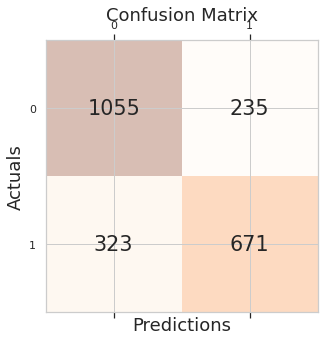

In [ ]:
#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
'''
def __init__(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
'''


clf = DecisionTreeClassifier(min_samples_split=8)
clf.fit(tfidf_train_X, tfidf_train_Y)
pred_y = clf.predict(tfidf_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(tfidf_test_y, pred_y))
print('Recall: %.3f' % recall_score(tfidf_test_y, pred_y))
print('Precision: %.3f' % precision_score(tfidf_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(tfidf_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=tfidf_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Ensemble Method (SVM, LogisticRegr, DecistionTree)

**CountVector**

Hard Voting Score 0.805
Recall: 0.679
Precision: 0.843
F1 Score: 0.752


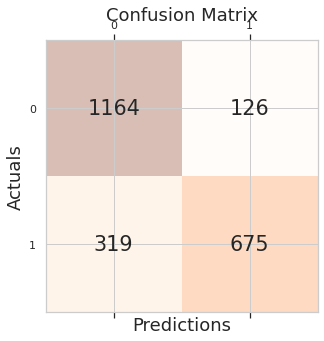

In [ ]:
from sklearn.ensemble import VotingClassifier
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
'''

ensembleModels = []
ensembleModels.append(('LR',  LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)))
ensembleModels.append(('SVM', svm.SVC(kernel='sigmoid',probability = True)))
ensembleModels.append(('DT', DecisionTreeClassifier(min_samples_split=8)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = ensembleModels, voting ='hard')
vot_hard.fit(cv_train_X, cv_train_Y)
pred_y = vot_hard.predict(cv_test_X)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(cv_test_y, pred_y)
print("Hard Voting Score %.3f" % score)
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**TF-IDF**

Hard Voting Score 0.785
Recall: 0.570
Precision: 0.897
F1 Score: 0.697


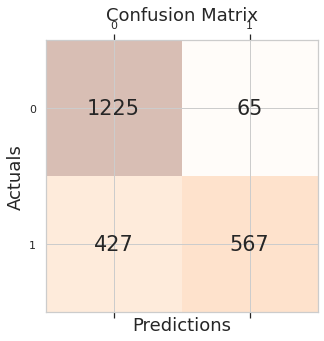

In [ ]:

'''
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
'''

ensembleModels = []
ensembleModels.append(('LR',  LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)))
ensembleModels.append(('SVM', svm.SVC(kernel='sigmoid',probability = True)))
ensembleModels.append(('DT', DecisionTreeClassifier(min_samples_split=8)))
  
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = ensembleModels, voting ='hard')
vot_hard.fit(tfidf_train_X, tfidf_train_Y)
pred_y = vot_hard.predict(tfidf_test_X)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(tfidf_test_y, pred_y)
print("Hard Voting Score %.3f" % score)
print('Recall: %.3f' % recall_score(tfidf_test_y, pred_y))
print('Precision: %.3f' % precision_score(tfidf_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(tfidf_test_y, pred_y))

conf_matrix = confusion_matrix(y_true=tfidf_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Hard Voting Score 0.626
Recall: 0.194
Precision: 0.785
F1 Score: 0.311


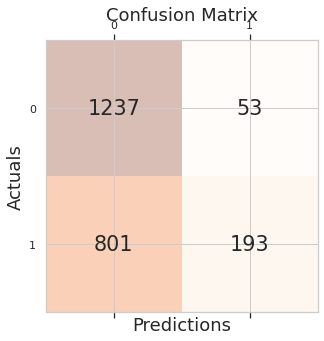

In [ ]:

'''
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
'''

ensembleModels = []
ensembleModels.append(('LR',  LogisticRegression(C=0.15, penalty='l2', tol=0.001, solver='saga', random_state=42, max_iter=1000)))
ensembleModels.append(('SVM', svm.SVC(kernel='sigmoid',probability = True)))
ensembleModels.append(('DT', DecisionTreeClassifier(min_samples_split=8)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = ensembleModels, voting ='hard')
vot_hard.fit(w2v_train_X, w2v_train_Y)
pred_y = vot_hard.predict(w2v_test_X)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(w2v_test_y, pred_y)
print("Hard Voting Score %.3f" % score)
print('Recall: %.3f' % recall_score(w2v_test_y, pred_y))
print('Precision: %.3f' % precision_score(w2v_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(w2v_test_y, pred_y))

conf_matrix = confusion_matrix(y_true=w2v_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()